## Customer Chrun Prediction using Deep Learning with TensorFlow and Keras.
Kaggle Dataset URL : https://www.kaggle.com/datasets/rjmanoj/credit-card-customer-churn-prediction <br>
Youtube Reference : https://www.youtube.com/watch?v=9wmImImmgcI&list=PLKnIA16_RmvYuZauWaPlRTC54KxSNLtNn&index=11

## Importing Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Reading the data

In [3]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# chacking the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# Checking NULLs
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# Dropping the unnecessary columns
data.drop(columns=['RowNumber', 'CustomerId','Surname'],inplace=True)

## Checking the numerical and categorical variables

In [41]:
categorical = [column for column in data.columns if data[column].dtype == 'O']
numerical = [column for column in data.columns if data[column].dtype != 'O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :\n\n', numerical)

There are 2 categorical variables

The categorical variables are :

 ['Geography', 'Gender']
There are 9 numerical variables

The numerical variables are :

 ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [42]:
for var in categorical: 
    print(var)
    print("--------------------------------")
    print(data[var].value_counts())

Geography
--------------------------------
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Gender
--------------------------------
Male      5457
Female    4543
Name: Gender, dtype: int64


In [43]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Data Visualization

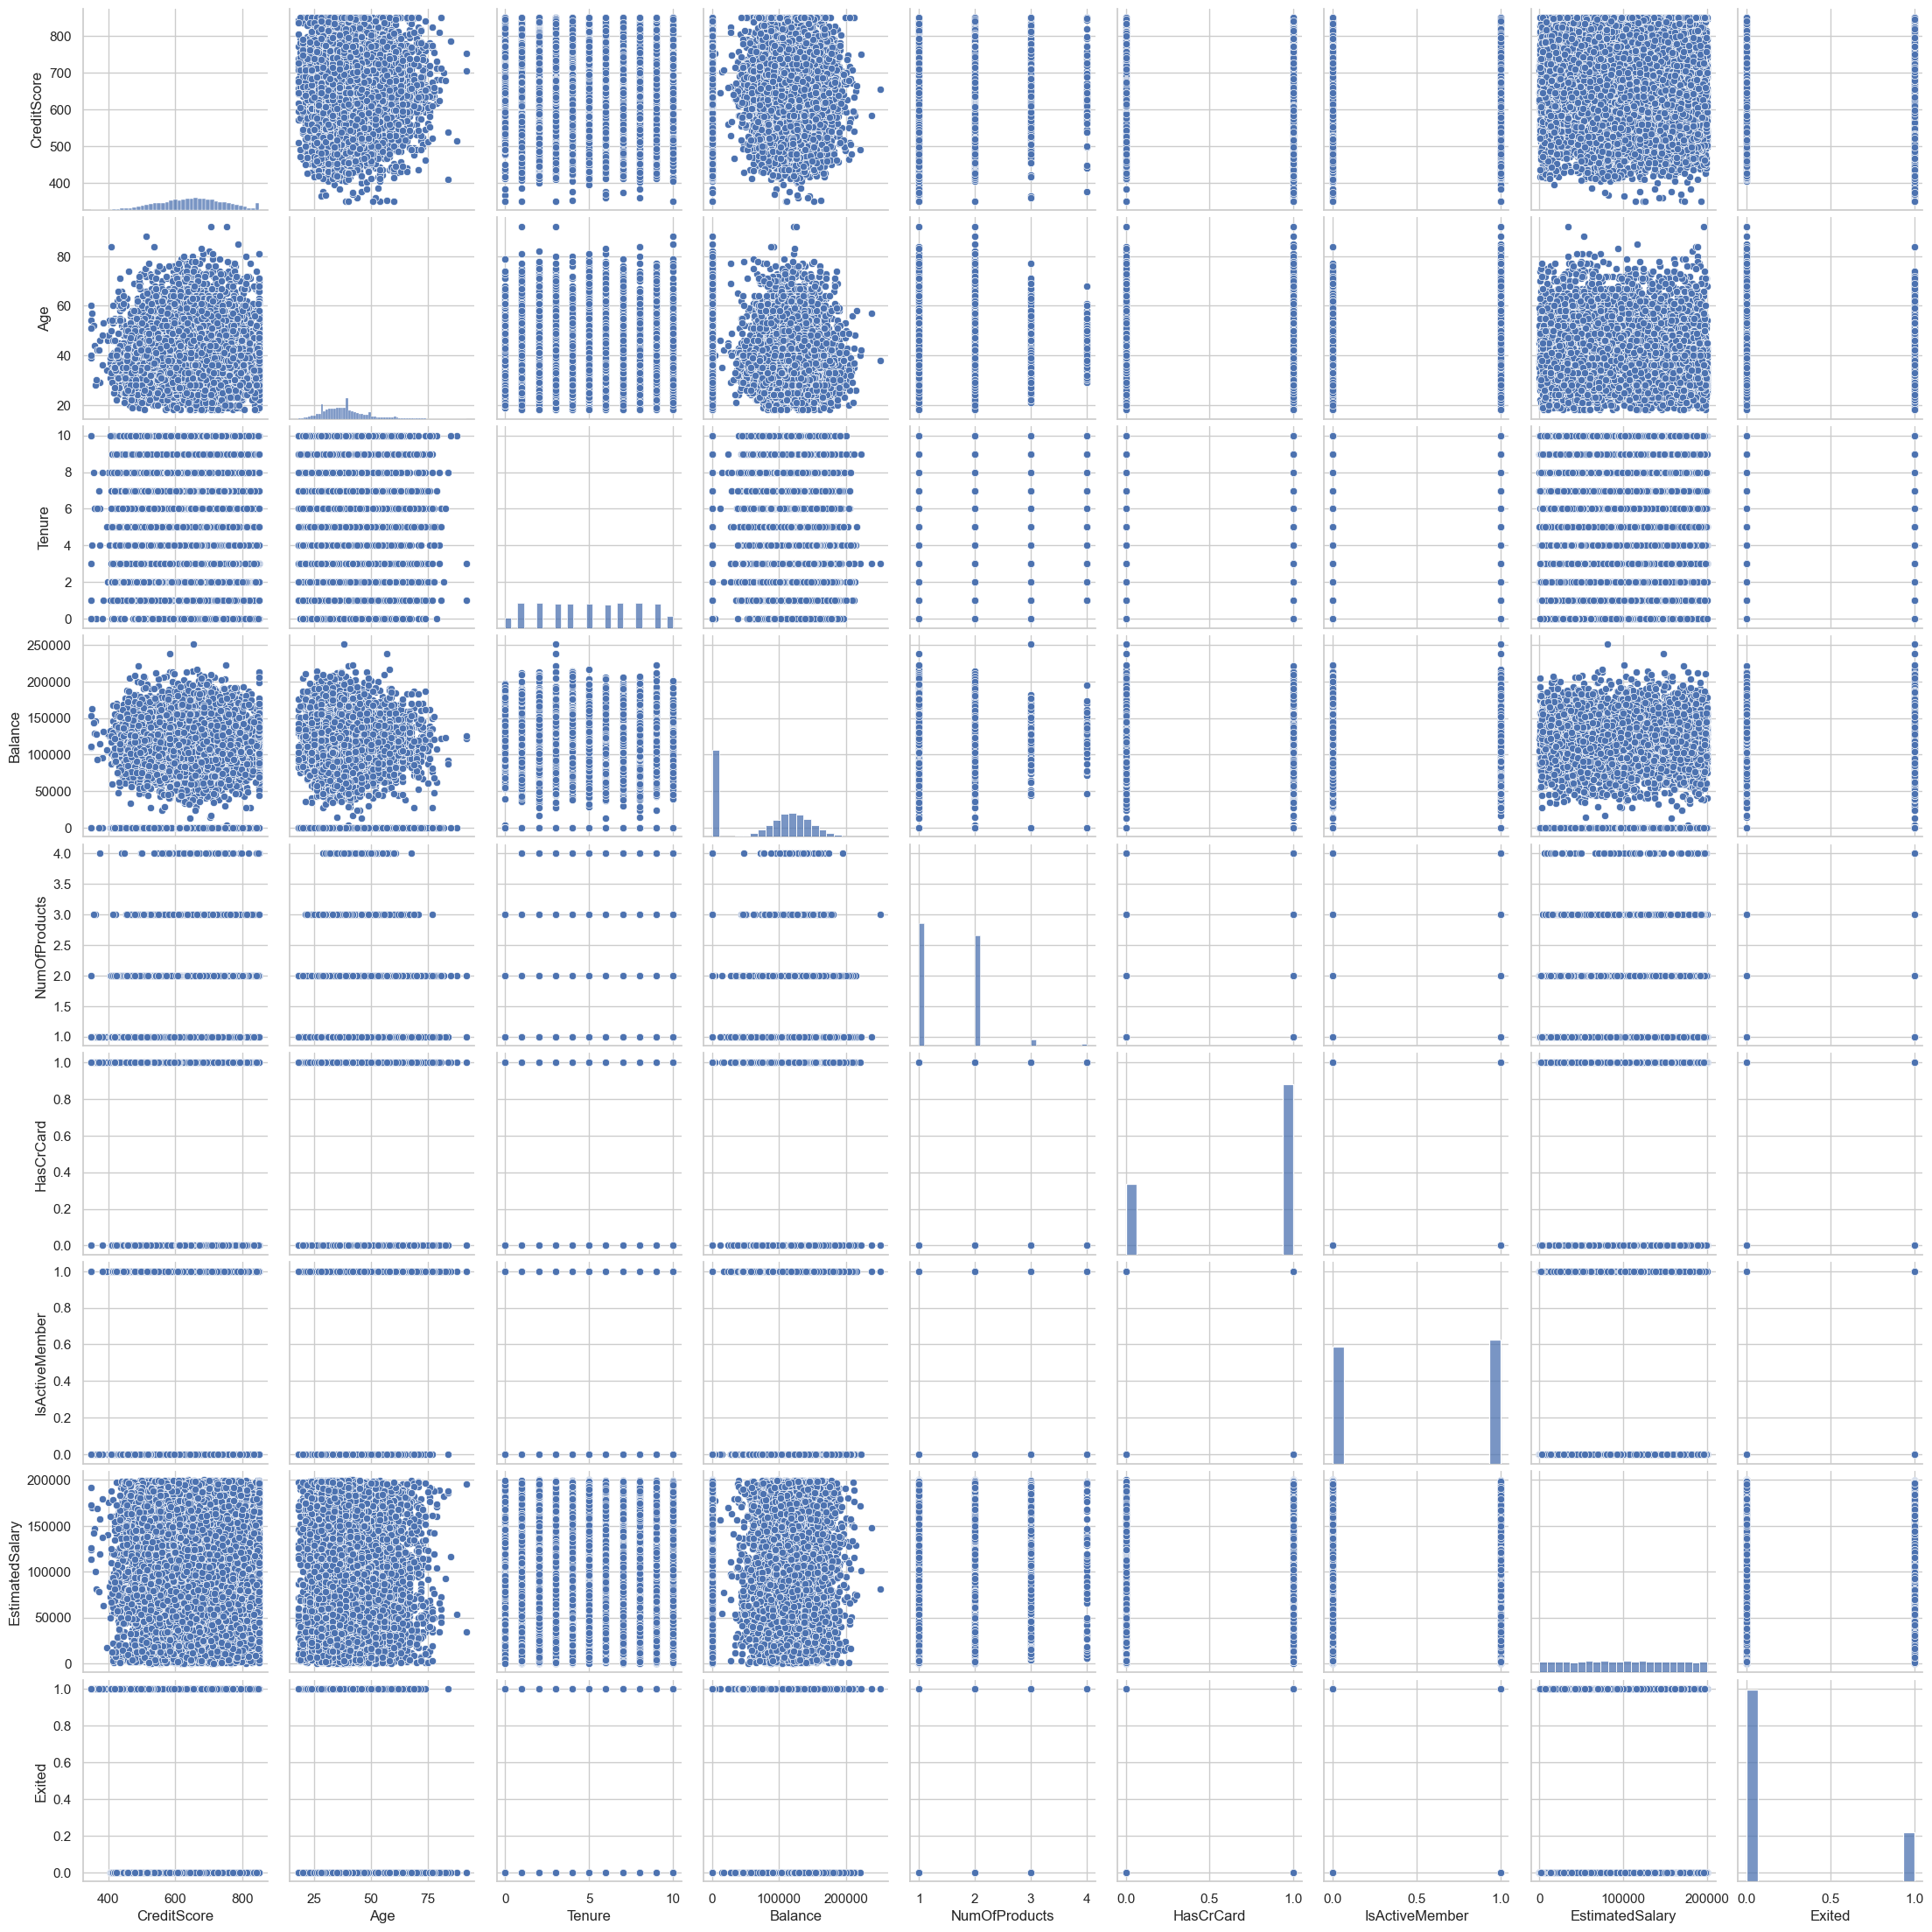

In [44]:
sns.pairplot(data = data)

## Categorical Variables

<AxesSubplot:xlabel='Exited', ylabel='count'>

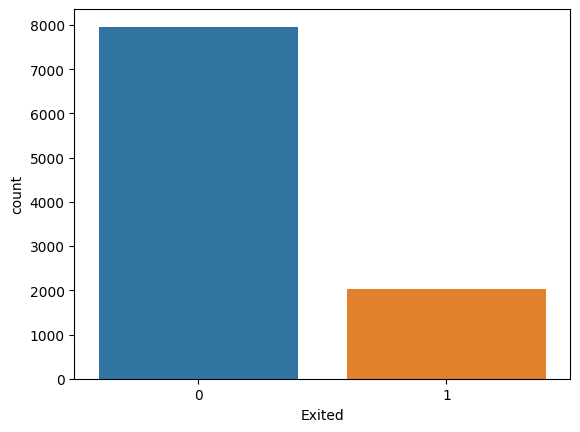

In [12]:
# Target values
sns.countplot(data=data, x='Exited')

There are more people who are exited than present from the above graph.

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

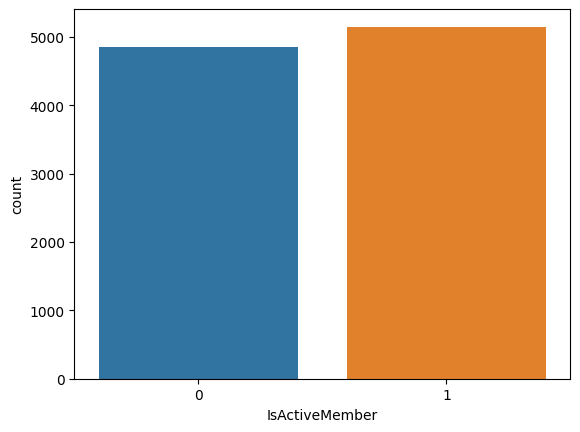

In [13]:
# Independent variables
sns.countplot(data=data,x='IsActiveMember')

The active and inactive members are nearly identical from the given dataset.

<AxesSubplot:xlabel='Gender', ylabel='count'>

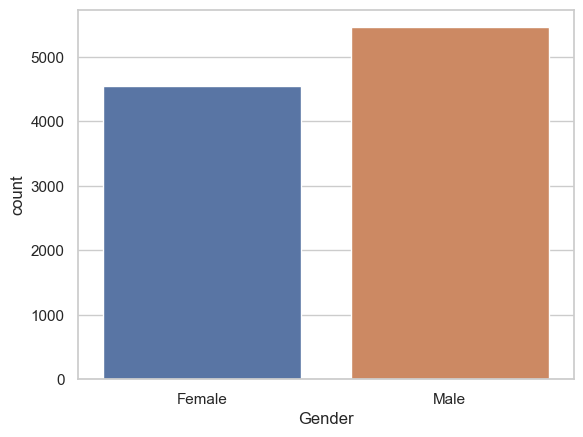

In [47]:
sns.countplot(data,x='Gender')

The male credit cardholders are more than the female people

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

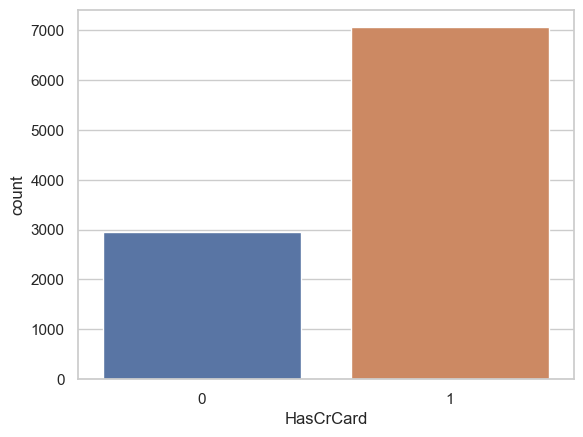

In [48]:
sns.countplot(data,x='HasCrCard')

From the above plot we can see that more people own the credit card which is almost double than the people who didn't.

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

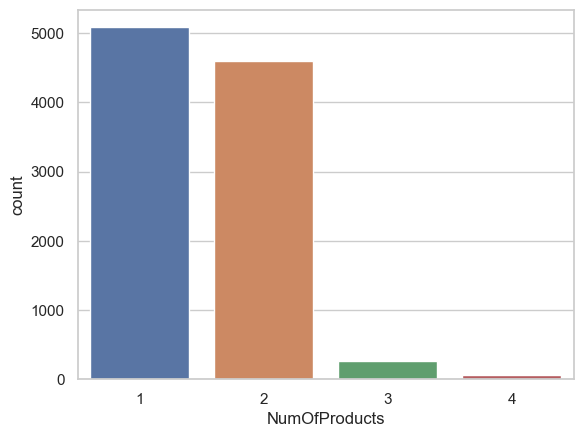

In [49]:
sns.countplot(data,x='NumOfProducts')

There are 4 products in total that can be bought using credit cards and 1 being the highest and 4 is the lowest. We can assume that company is initally starting the credit card services by making the deal with retail developers.

<AxesSubplot:xlabel='Geography', ylabel='count'>

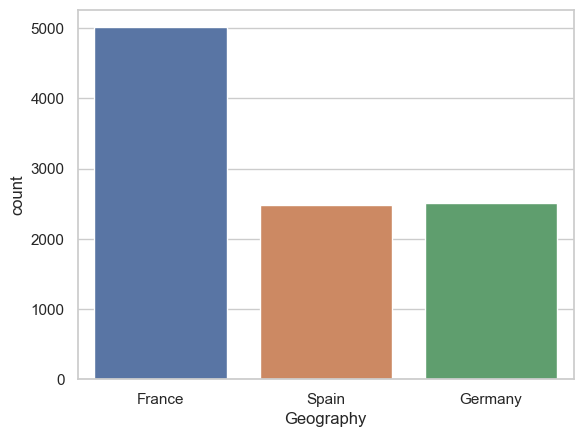

In [50]:
sns.countplot(data,x='Geography')

France using most credit cards which is almost the same as the combined usage of Spain and Germany. We can think the the credit card is the company is initally the france based company and trying to establish the company in Spain and Germany.

The above graph is having that there are 10 years of tenure that been taken by the people who has taken credit.

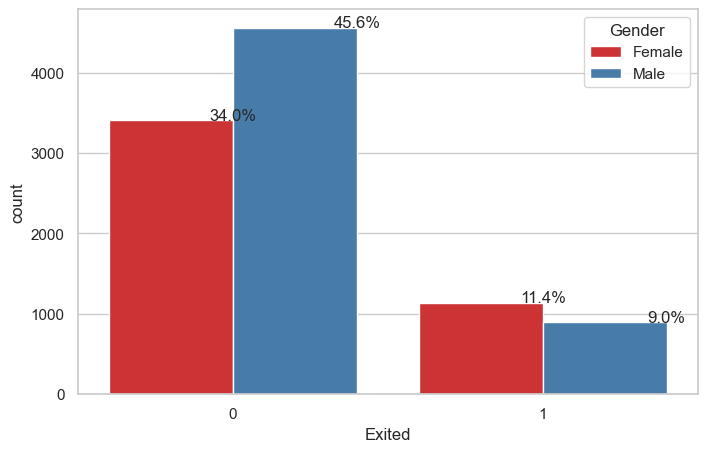

In [52]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(data))
ax = sns.countplot(x="Exited", hue="Gender", data=data,palette='Set1')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

* From the above plot we can see that in females are in less number than males from the exited people from the credict card company.

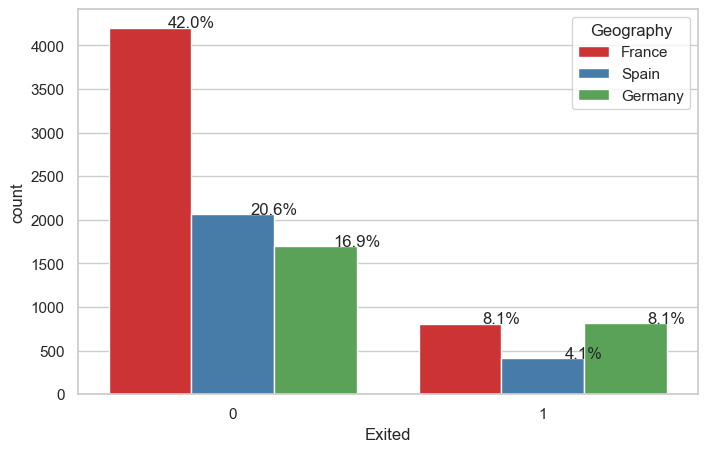

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(data))
ax = sns.countplot(x="Exited", hue="Geography", data=data,palette='Set1')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

<AxesSubplot:xlabel='Tenure', ylabel='count'>

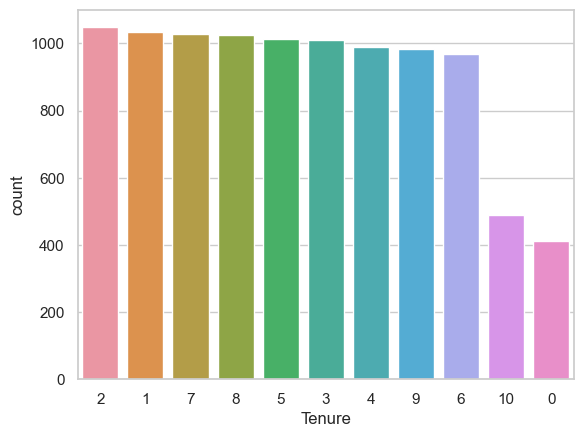

In [51]:
tenure_order = data['Tenure'].value_counts().index
sns.countplot(data,x='Tenure',order=tenure_order)

Many customers has taken the 2 years as tenure and 0 has the lowest customers

<AxesSubplot:xlabel='Tenure', ylabel='count'>

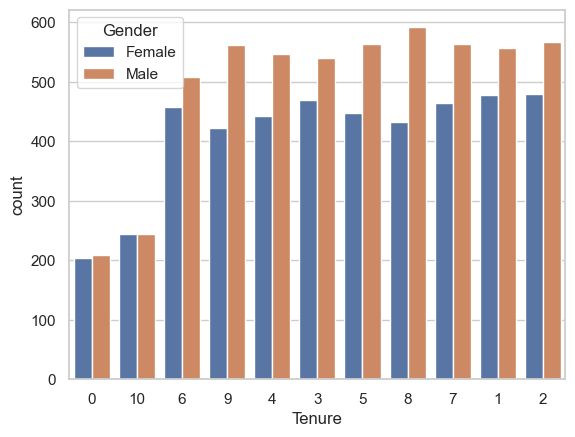

In [53]:
tenure_order = data['Tenure'].value_counts().index[::-1]
sns.countplot(data,x='Tenure',hue='Gender',order=tenure_order)

* From the above plot we can see that in females are in less number than males from the tenure from 0 to 10 years.

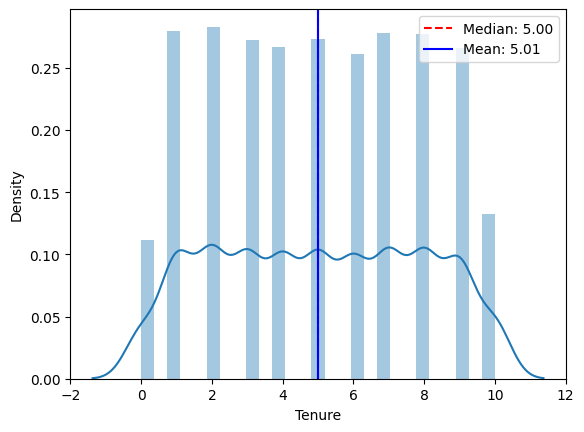

In [21]:
# Create a distplot
sns.distplot(data['Tenure'], kde=True)

# Calculate the median and mean
median_Tenure = data['Tenure'].median()
mean_Tenure = data['Tenure'].mean()

# Add vertical lines for median and mean
plt.axvline(median_Tenure, color='red', linestyle='--', label=f'Median: {median_Tenure:.2f}')
plt.axvline(mean_Tenure, color='blue', linestyle='-', label=f'Mean: {mean_Tenure:.2f}')

# Add a legend
plt.legend()

# Show the plot
plt.show()


* From the above graph we can see that the average tenure is 5 years and and 0 and 10 years coustomers are same and small in number than the rest.And the rest of the coustomers are are almost of the same density.

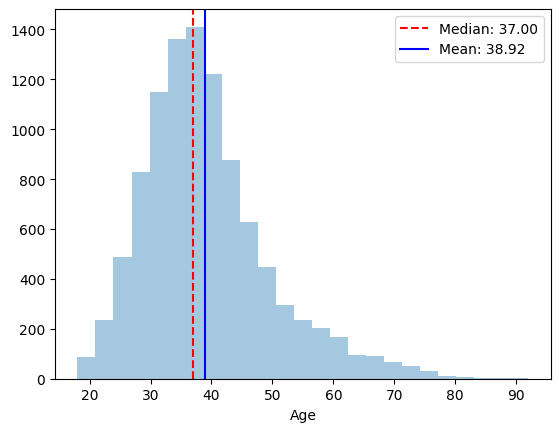

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a distplot
sns.distplot(data['Age'], kde=False, bins=25)

# Calculate the median and mean
median_age = data['Age'].median()
mean_age = data['Age'].mean()

# Add vertical lines for median and mean
plt.axvline(median_age, color='red', linestyle='--', label=f'Median: {median_age:.2f}')
plt.axvline(mean_age, color='blue', linestyle='-', label=f'Mean: {mean_age:.2f}')

# Add a legend
plt.legend()

# Show the plot
plt.show()


* From the above distribution, we can see that the company is targeting the customers who are between the age of 30 to 45 and distribution is rigth skewed means there are less customers who age is greater than 38 approxiamtely.

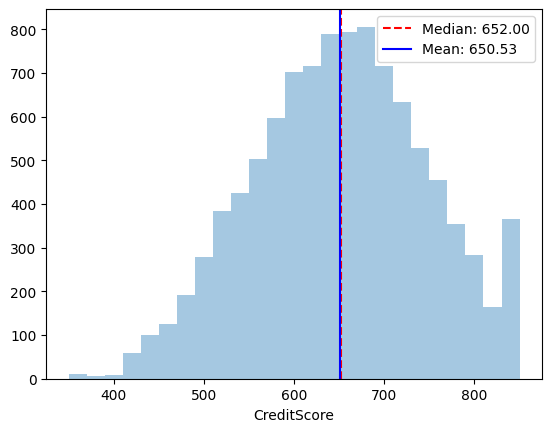

In [18]:
# Create a distplot
sns.distplot(data['CreditScore'], kde=False, bins=25)

# Calculate the median and mean
median_CreditScore = data['CreditScore'].median()
mean_CreditScore = data['CreditScore'].mean()

# Add vertical lines for median and mean
plt.axvline(median_CreditScore, color='red', linestyle='--', label=f'Median: {median_CreditScore:.2f}')
plt.axvline(mean_CreditScore, color='blue', linestyle='-', label=f'Mean: {mean_CreditScore:.2f}')

# Add a legend
plt.legend()

# Show the plot
plt.show()


* The above distribution sates that the customers have the average credit score of 650  which is almost same as median which means that distribution is almost a noraml distribution.
* But the above distribution is left skeved and states that most of the customers above the average credit score and we can assume that customers get more loans and benifts.

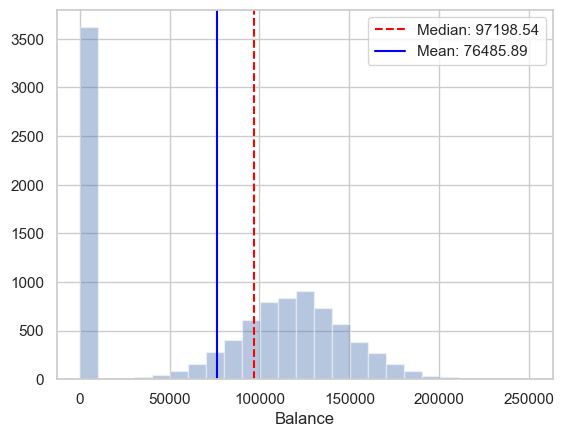

In [26]:
# Create a distplot
sns.distplot(data['Balance'], kde=False, bins=25)

# Calculate the median and mean
median_Balance = data['Balance'].median()
mean_Balance = data['Balance'].mean()

# Add vertical lines for median and mean
plt.axvline(median_Balance, color='red', linestyle='--', label=f'Median: {median_Balance:.2f}')
plt.axvline(mean_Balance, color='blue', linestyle='-', label=f'Mean: {mean_Balance:.2f}')

# Add a legend
plt.legend()

# Show the plot
plt.show()


* Above plot denotes there are more than 3500 customers having the zero balance in their accounts(might be the employees accounts .i.e, salary accounts which are always zero balance accounts).
* If we omit the zero balance accounts, the distribution is a normal distribution with the mean and median of 7648.89 and 97198.54 respectively.
We can expect the difference in mean and median due to the vast number of zero balance accounts.

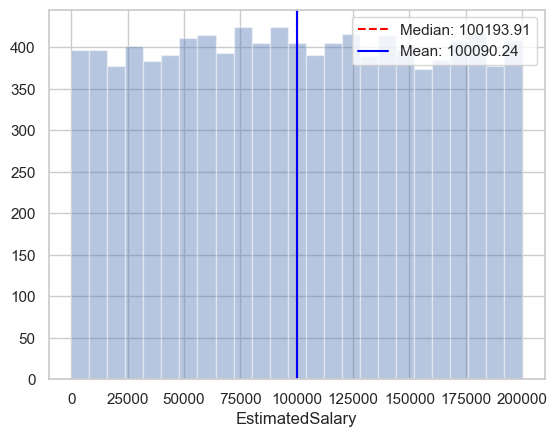

In [27]:
# Create a distplot
sns.distplot(data['EstimatedSalary'], kde=False, bins=25)

# Calculate the median and mean
median_EstimatedSalary = data['EstimatedSalary'].median()
mean_EstimatedSalary = data['EstimatedSalary'].mean()

# Add vertical lines for median and mean
plt.axvline(median_EstimatedSalary, color='red', linestyle='--', label=f'Median: {median_EstimatedSalary:.2f}')
plt.axvline(mean_EstimatedSalary, color='blue', linestyle='-', label=f'Mean: {mean_EstimatedSalary:.2f}')

# Add a legend
plt.legend()

# Show the plot
plt.show()


* The above graph states that there are estimated salaries of all the ranges and there are accounts having the estimated salaries of zero which are in the number close to 400, we can see those are joint or dependent accounts.
* The mean and median salary is 100090.24 and 100193.91 respeictive which is almost same.

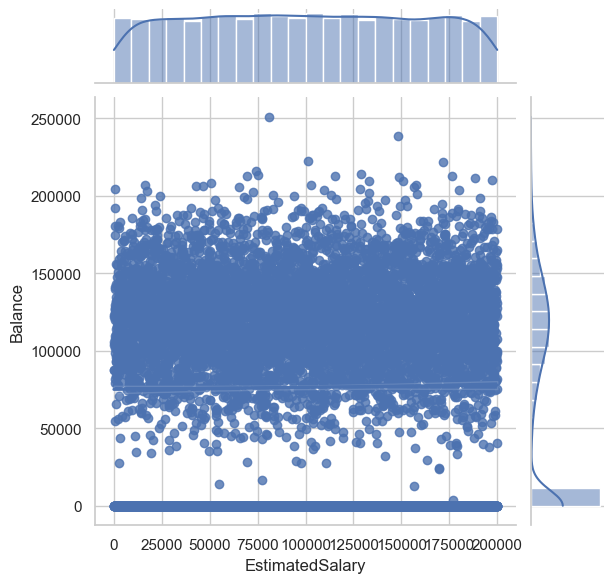

In [34]:
# sns.stripplot(x='EstimatedSalary',y='Balance',data=data, palette='seismic')
sns.jointplot(x='EstimatedSalary', y='Balance', data=data, kind='reg')

* The above graph depects the relation between the estimated salary and balance, which tells that the zero balance accoutns are there for all the ranges of the salaries and there is no correlation between the estimated salary and and the balance.

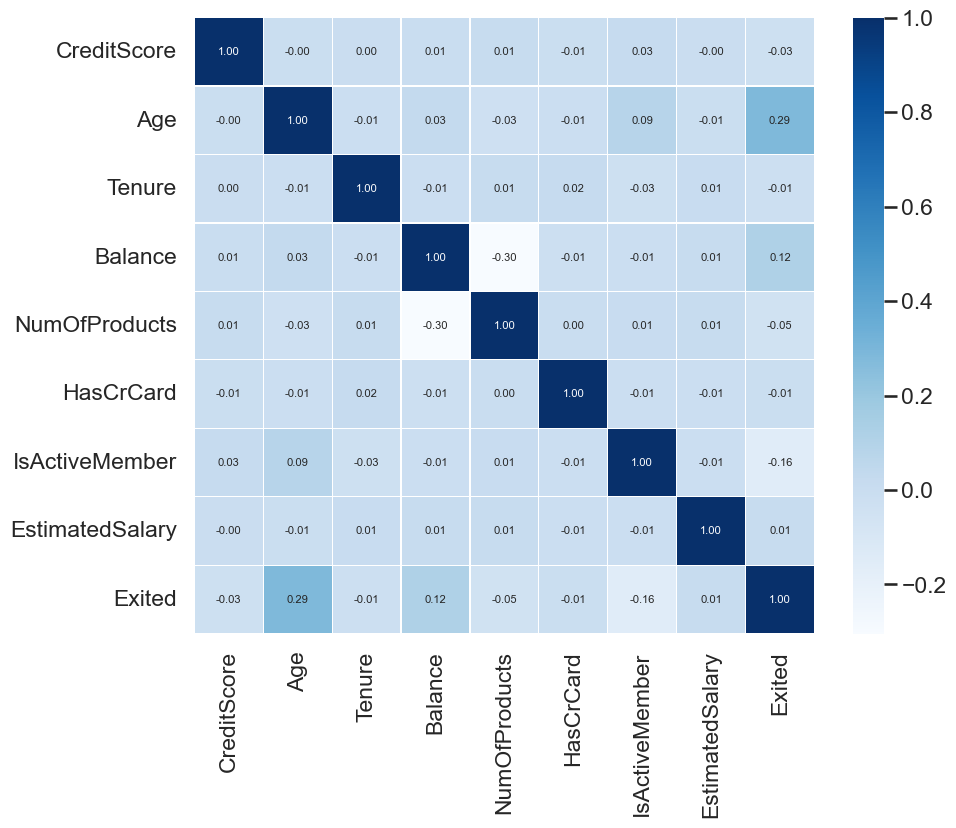

In [53]:
# Create a correlation matrix from your DataFrame (assuming 'data' is your DataFrame)
correlation_matrix = data.corr()
# Set the size of the plot
plt.figure(figsize=(10, 8))
# Define the annotation font size
annot_font_size = 8
# Create a heatmap with reduced annotation fontsize
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=.2, annot_kws={"size": annot_font_size})
# Show the plot
plt.show()

* The dataset is not correlated and have very less or no correlation at all.

In [56]:
df = pd.get_dummies(data,columns=['Geography','Gender'],drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [57]:
X = df.drop(columns=['Exited'])
Y = df['Exited'].values
from sklearn.model_selection import train_test_split
X_test,X_train,Y_test,Y_train = train_test_split(X,Y,test_size=0.2,random_state=0)

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [59]:
import tensorflow as tf
from tensorflow.keras.layers import Normalization,Dense,InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [60]:
model = tf.keras.Sequential([
                             InputLayer(input_shape = (11,)),
                             Dense(11, activation = "sigmoid"),
                             Dense(11, activation = "sigmoid"),
                             Dense(1, activation = "sigmoid"),
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 11)                132       
                                                                 
 dense_8 (Dense)             (None, 11)                132       
                                                                 
 dense_9 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.compile(optimizer = Adam(learning_rate = 0.1),
              loss = 'binary_crossentropy',
              metrics = 'accuracy')

In [78]:
history = model.fit(X_train_trf,Y_train,epochs=10,validation_split=0.2)

Epoch 1/10
50/50 [==============================] - 1s 12ms/step - loss: 0.3347 - accuracy: 0.8644 - val_loss: 0.3312 - val_accuracy: 0.8750
Epoch 2/10
50/50 [==============================] - 0s 5ms/step - loss: 0.3137 - accuracy: 0.8781 - val_loss: 0.3226 - val_accuracy: 0.8725
Epoch 3/10
50/50 [==============================] - 0s 5ms/step - loss: 0.3175 - accuracy: 0.8750 - val_loss: 0.3485 - val_accuracy: 0.8600
Epoch 4/10
50/50 [==============================] - 0s 6ms/step - loss: 0.3069 - accuracy: 0.8763 - val_loss: 0.3335 - val_accuracy: 0.8775
Epoch 5/10
50/50 [==============================] - 0s 6ms/step - loss: 0.3190 - accuracy: 0.8744 - val_loss: 0.3653 - val_accuracy: 0.8575
Epoch 6/10
50/50 [==============================] - 0s 5ms/step - loss: 0.3053 - accuracy: 0.8781 - val_loss: 0.3512 - val_accuracy: 0.8675
Epoch 7/10
50/50 [==============================] - 0s 6ms/step - loss: 0.3055 - accuracy: 0.8825 - val_loss: 0.3692 - val_accuracy: 0.8575
Epoch 8/10
50/50 [=

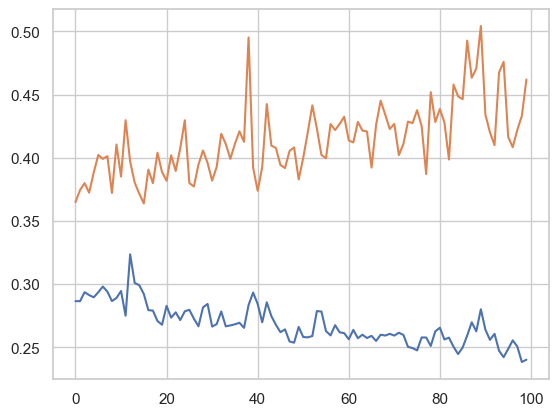

In [96]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')

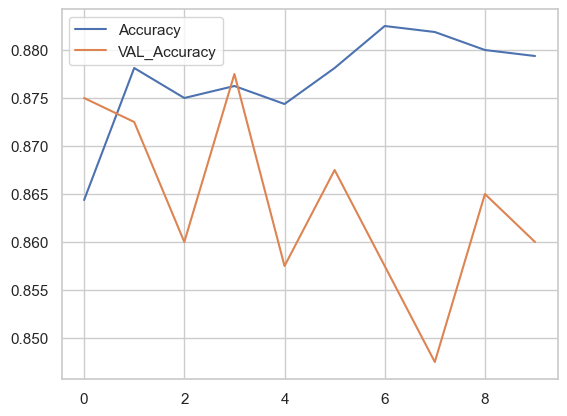

In [92]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation_Accuracy')
plt.legend()

In [86]:
y_log = model.predict(X_test_trf)

250/250 [==============================] - 0s 2ms/step


In [87]:
y_pred = np.where(y_log > 0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.827375

## Improving model performance by incresing Epochs

In [93]:
history = model.fit(X_train_trf,Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
50/50 [==============================] - 1s 10ms/step - loss: 0.2866 - accuracy: 0.8825 - val_loss: 0.3649 - val_accuracy: 0.8700
Epoch 2/100
50/50 [==============================] - 0s 6ms/step - loss: 0.2865 - accuracy: 0.8825 - val_loss: 0.3745 - val_accuracy: 0.8650
Epoch 3/100
50/50 [==============================] - 0s 9ms/step - loss: 0.2937 - accuracy: 0.8819 - val_loss: 0.3799 - val_accuracy: 0.8600
Epoch 4/100
50/50 [==============================] - 0s 7ms/step - loss: 0.2914 - accuracy: 0.8869 - val_loss: 0.3724 - val_accuracy: 0.8700
Epoch 5/100
50/50 [==============================] - 0s 6ms/step - loss: 0.2896 - accuracy: 0.8869 - val_loss: 0.3882 - val_accuracy: 0.8575
Epoch 6/100
50/50 [==============================] - 0s 10ms/step - loss: 0.2936 - accuracy: 0.8769 - val_loss: 0.4022 - val_accuracy: 0.8525
Epoch 7/100
50/50 [==============================] - 0s 7ms/step - loss: 0.2982 - accuracy: 0.8800 - val_loss: 0.3991 - val_accuracy: 0.8500
Epoch 8/100

In [136]:
def plots(history):
    plt.figure(figsize=(20,5),dpi=100)
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'],label='loss')
    plt.plot(history.history['val_loss'],label='val_loss')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'],label='accuracy')
    plt.plot(history.history['val_accuracy'],label='Validation_Accuracy')
    plt.legend()
    plt.show()
    

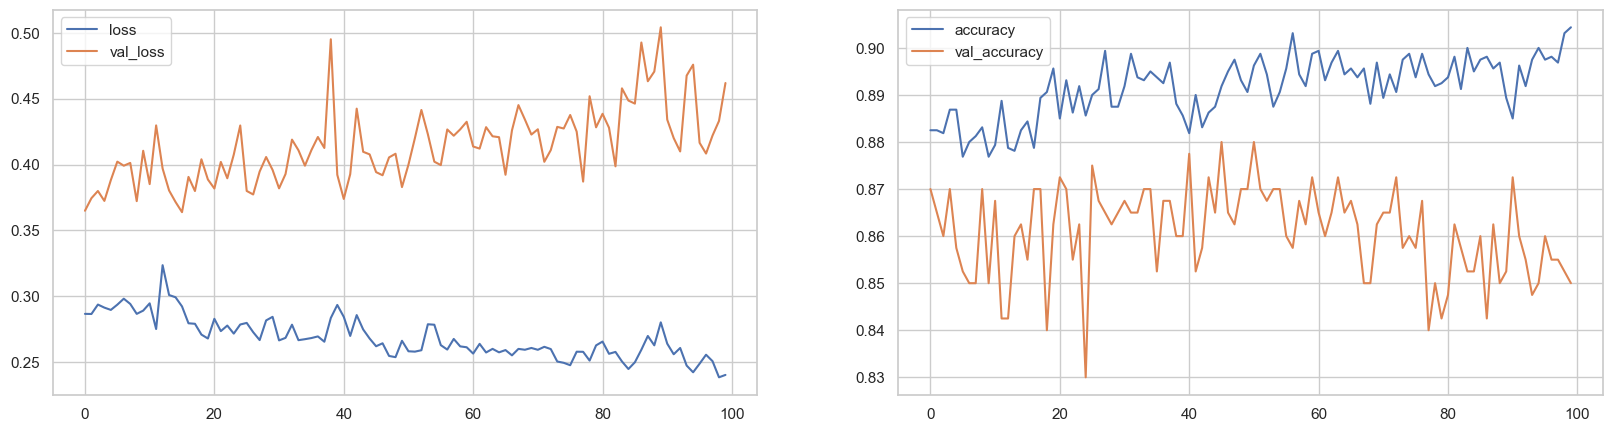

In [120]:
plots(history)

In [134]:
def cal_accuracy(X_test_trf,model):
    y_log = model.predict(X_test_trf)
    y_pred = np.where(y_log > 0.5,1,0)
    print("Accuracy : ",accuracy_score(Y_test,y_pred))

In [137]:
cal_accuracy(X_test_trf,model)

250/250 [==============================] - 0s 1ms/step
Accuracy :  0.820125


## Increase the model performance by increasing the hidden layers

In [123]:
model1 = tf.keras.Sequential([
                             InputLayer(input_shape = (11,)),
                             Dense(11, activation = "sigmoid"),
                             Dense(128, activation = "sigmoid"),
                             Dense(128, activation = "sigmoid"),
                             Dense(1, activation = "sigmoid"),
])
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 11)                132       
                                                                 
 dense_11 (Dense)            (None, 128)               1536      
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 18,309
Trainable params: 18,309
Non-trainable params: 0
_________________________________________________________________


In [124]:
model1.compile(optimizer = Adam(learning_rate = 0.1),
              loss = 'binary_crossentropy',
              metrics = 'accuracy')

In [138]:
model_history = model1.fit(X_train_trf,Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
50/50 [==============================] - 1s 6ms/step - loss: 0.7761 - accuracy: 0.7044 - val_loss: 0.4730 - val_accuracy: 0.8200
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5695 - accuracy: 0.7844 - val_loss: 0.5442 - val_accuracy: 0.8200
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5643 - accuracy: 0.7806 - val_loss: 0.5146 - val_accuracy: 0.8200
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5813 - accuracy: 0.7769 - val_loss: 0.5521 - val_accuracy: 0.8200
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5742 - accuracy: 0.7919 - val_loss: 0.5244 - val_accuracy: 0.8200
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6434 - accuracy: 0.7506 - val_loss: 0.5911 - val_accuracy: 0.8200
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5623 - accuracy: 0.7869 - val_loss: 0.4719 - val_accuracy: 0.8200
Epoch 8/100
5

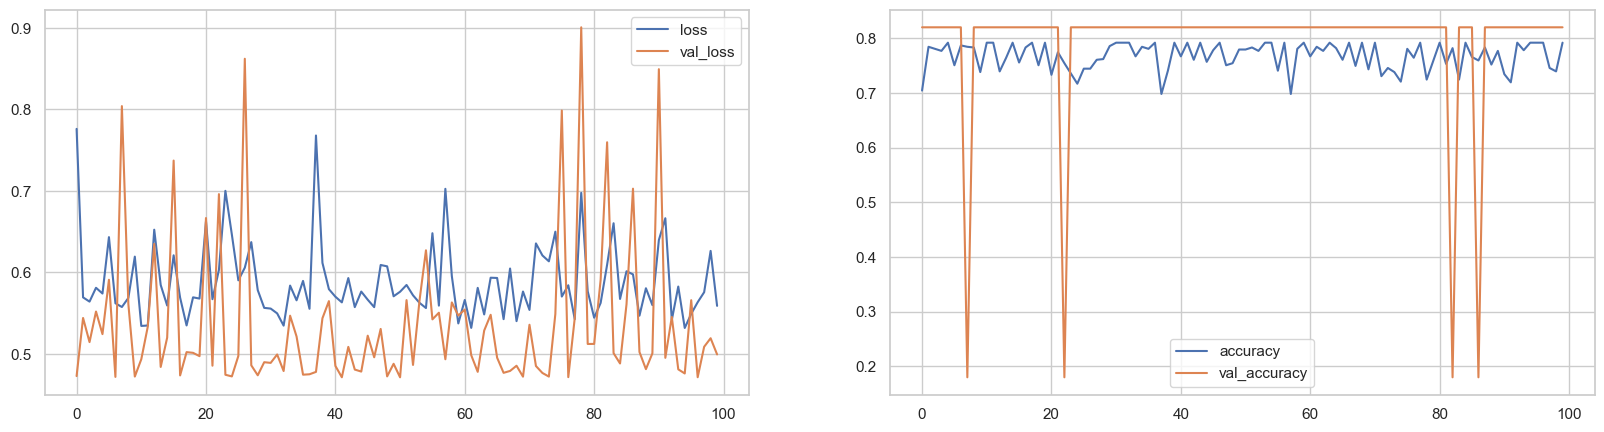

In [139]:
plots(model_history)

In [140]:
cal_accuracy(X_test_trf,model1)

250/250 [==============================] - 0s 1ms/step
Accuracy :  0.796


## Improving model performance by changing the Learning Rate

In [141]:
model2 = tf.keras.Sequential([
                             InputLayer(input_shape = (11,)),
                             Dense(11, activation = "sigmoid"),
                             Dense(128, activation = "sigmoid"),
                             Dense(128, activation = "sigmoid"),
                             Dense(1, activation = "sigmoid"),
])
model2.compile(optimizer = Adam(learning_rate = 0.01),
              loss = 'binary_crossentropy',
              metrics = 'accuracy')
mHistory = model2.fit(X_train_trf,Y_train,epochs=500,validation_split=0.2)

Epoch 1/500
50/50 [==============================] - 1s 7ms/step - loss: 0.5477 - accuracy: 0.7769 - val_loss: 0.4546 - val_accuracy: 0.8200
Epoch 2/500
50/50 [==============================] - 0s 3ms/step - loss: 0.4614 - accuracy: 0.7969 - val_loss: 0.4285 - val_accuracy: 0.8075
Epoch 3/500
50/50 [==============================] - 0s 3ms/step - loss: 0.4453 - accuracy: 0.7931 - val_loss: 0.4046 - val_accuracy: 0.8200
Epoch 4/500
50/50 [==============================] - 0s 2ms/step - loss: 0.4242 - accuracy: 0.8087 - val_loss: 0.4016 - val_accuracy: 0.8425
Epoch 5/500
50/50 [==============================] - 0s 2ms/step - loss: 0.4235 - accuracy: 0.8087 - val_loss: 0.4018 - val_accuracy: 0.8300
Epoch 6/500
50/50 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.8106 - val_loss: 0.3918 - val_accuracy: 0.8475
Epoch 7/500
50/50 [==============================] - 0s 2ms/step - loss: 0.4040 - accuracy: 0.8338 - val_loss: 0.4127 - val_accuracy: 0.8150
Epoch 8/500
5

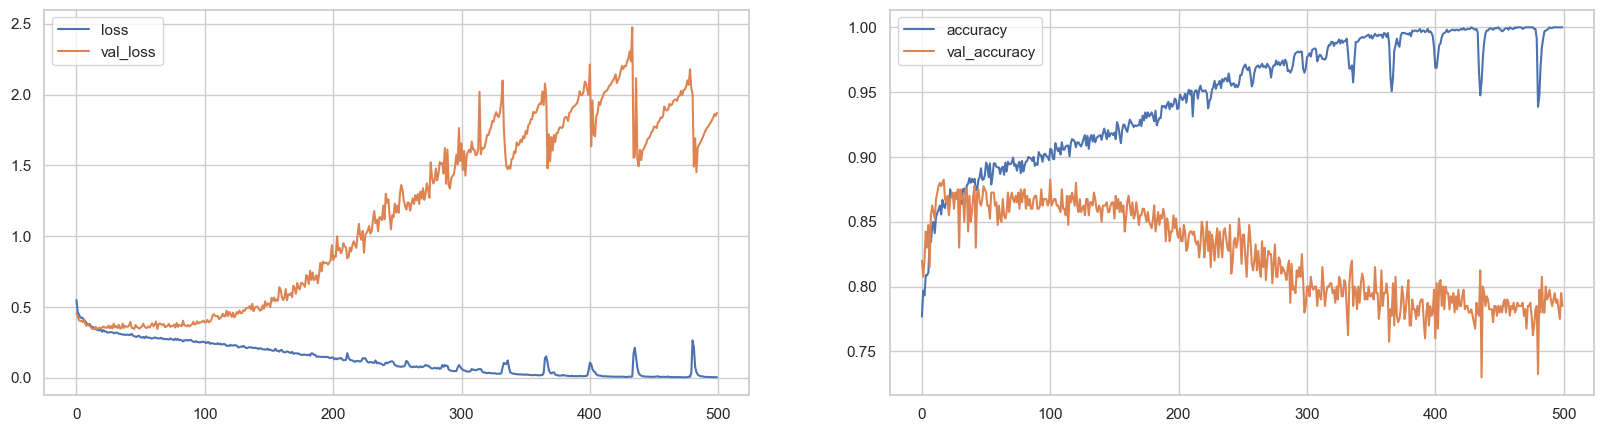

In [142]:
plots(mHistory)

In [143]:
cal_accuracy(X_test_trf,model2)

250/250 [==============================] - 0s 1ms/step
Accuracy :  0.7955


## Improving model performance by changing the activation function

In [158]:
rmodel = tf.keras.Sequential([
                             InputLayer(input_shape = (11,)),
                             Dense(11, activation = "relu"),
                             Dense(11, activation = "relu"),
                             Dense(11, activation = "relu"),
                             Dense(1, activation = "relu"),
])
rmodel.compile(optimizer = Adam(learning_rate = 0.01),
              loss = 'binary_crossentropy',
              metrics = 'accuracy')
rHistory = rmodel.fit(X_train_trf,Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
50/50 [==============================] - 1s 6ms/step - loss: 0.9736 - accuracy: 0.7794 - val_loss: 0.5740 - val_accuracy: 0.8275
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5514 - accuracy: 0.8087 - val_loss: 0.6535 - val_accuracy: 0.8350
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4808 - accuracy: 0.8100 - val_loss: 0.5938 - val_accuracy: 0.8225
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4843 - accuracy: 0.8169 - val_loss: 0.5157 - val_accuracy: 0.8300
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4352 - accuracy: 0.8250 - val_loss: 0.4625 - val_accuracy: 0.8450
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8438 - val_loss: 0.5285 - val_accuracy: 0.8475
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4707 - accuracy: 0.8369 - val_loss: 0.7444 - val_accuracy: 0.8500
Epoch 8/100
5

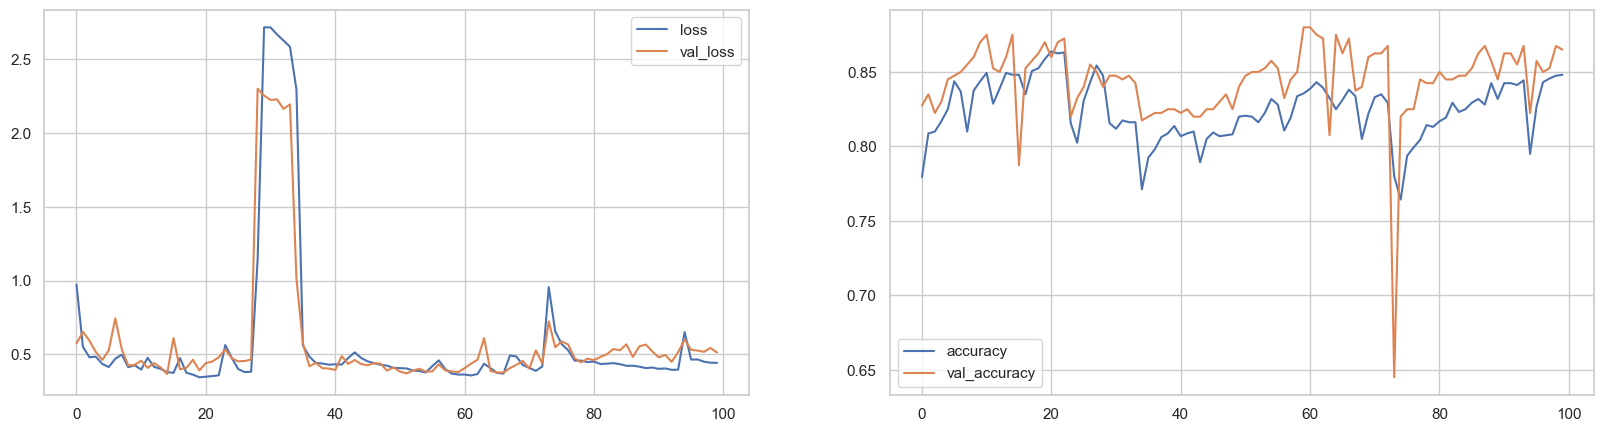

In [159]:
plots(rHistory)

In [160]:
cal_accuracy(X_test_trf,rmodel)

250/250 [==============================] - 0s 1ms/step
Accuracy :  0.841125
